<a href="https://colab.research.google.com/github/wgcv/03MAIR-Algoritmos-de-Optimizacion/blob/main/AG3/Algoritmos_AG3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AG3 - Actividad Guiada 3
Nombre: Washington Gustavo Cevallos <br>
Link:   https://colab.research.google.com/github/wgcv/03MAIR-Algoritmos-de-Optimizacion/blob/main/AG3/Algoritmos_AG3.ipynb <br>
Github: https://github.com/wgcv/03MAIR-Algoritmos-de-Optimizacion/blob/main/AG3/Algoritmos_AG3.ipynb
<br>


#Carga de librerias

In [ ]:
!pip install requests
!pip install tabulate>=0.9 networkx>=3.0
!pip install tsplib95 --no-deps
!pip install deprecated

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsplib95 0.7.1 requires Deprecated~=1.2.9, but you have deprecated 1.3.1 which is incompatible.
tsplib95 0.7.1 requires networkx~=2.1, but you have networkx 3.6.1 which is incompatible.
tsplib95 0.7.1 requires tabulate~=0.8.7, but you have tabulate 0.9.0 which is incompatible.


In [ ]:
!pip install deprecated

#Carga de los datos del problema

In [ ]:

import urllib.request #Hacer llamadas http a paginas de la red
import tsplib95       #Modulo para las instancias del problema del TSP
import math           #Modulo de funciones matematicas. Se usa para exp
import random         #Para generar valores aleatorios


#Descargamos el fichero de datos(Matriz de distancias)
file = "swiss42.tsp" ;
#urllib.request.urlretrieve("https://raw.githubusercontent.com/mastqe/tsplib/refs/heads/master/swiss42.tsp", file + '.gz')
urllib.request.urlretrieve("https://raw.githubusercontent.com/mastqe/tsplib/refs/heads/master/swiss42.tsp", file  )
#!gzip -d swiss42.tsp.gz     #Descomprimir el fichero de datos

#Coordendas 51-city problem (Christofides/Eilon)
#file = "eil51.tsp" ; urllib.request.urlretrieve("http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp/eil51.tsp.gz", file)

#Coordenadas - 48 capitals of the US (Padberg/Rinaldi)
#file = "att48.tsp" ; urllib.request.urlretrieve("http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp/att48.tsp.gz", file)


#http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95
#Documentacion :
  # http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp95.pdf
  # https://tsplib95.readthedocs.io/en/stable/pages/usage.html
  # https://tsplib95.readthedocs.io/en/v0.6.1/modules.html
  # https://pypi.org/project/tsplib95/




('swiss42.tsp', <http.client.HTTPMessage at 0x7af398b4a0c0>)

In [ ]:
#Carga de datos y generación de objeto problem
###############################################################################
problem = tsplib95.load(file)

#Nodos
Nodos = list(problem.get_nodes())

#Aristas
Aristas = list(problem.get_edges())



In [ ]:
Nodos

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41]

In [ ]:
Aristas
# https://github.com/mastqe/tsplib/blob/master/swiss42.tsp


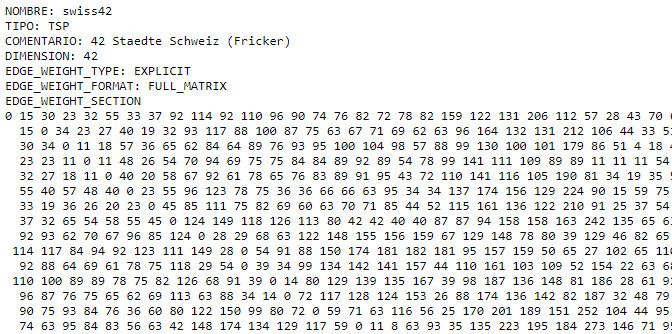

In [ ]:
#Probamos algunas funciones del objeto problem

#Distancia entre nodos
problem.get_weight(3, 0)

#Todas las funciones
#Documentación: https://tsplib95.readthedocs.io/en/v0.6.1/modules.html

#dir(problem)

23

#Funcionas basicas


In [ ]:

#Funcionas basicas
###############################################################################

#Se genera una solucion aleatoria con comienzo en en el nodo 0
def crear_solucion(Nodos):
  solucion = [Nodos[0]]
  for n in Nodos[1:]:
    solucion = solucion + [random.choice(list(set(Nodos) - set({Nodos[0]}) - set(solucion)))]
  return solucion

#Devuelve la distancia entre dos nodos
def distancia(a,b, problem):
  return problem.get_weight(a,b)

#Devuelve la distancia total de una trayectoria/solucion
def distancia_total(solucion, problem):
  distancia_total = 0
  for i in range(len(solucion)-1):
    distancia_total += distancia(solucion[i] ,solucion[i+1] ,  problem)
  return distancia_total + distancia(solucion[len(solucion)-1] ,solucion[0], problem)

sol_temporal = crear_solucion(Nodos)


print(sol_temporal   )
print(distancia_total(sol_temporal, problem))

[0, 3, 15, 25, 2, 39, 1, 32, 19, 20, 12, 34, 33, 28, 36, 13, 7, 4, 30, 22, 9, 18, 8, 11, 23, 24, 10, 37, 5, 14, 38, 29, 31, 41, 26, 6, 27, 17, 21, 16, 40, 35]
4905


#BUSQUEDA ALEATORIA

In [ ]:
###############################################################################
# BUSQUEDA ALEATORIA
###############################################################################

def busqueda_aleatoria(problem, N):
  #N es el numero de iteraciones
  Nodos = list(problem.get_nodes())

  mejor_solucion = []
  #mejor_distancia = 10e100                         #Inicializamos con un valor alto
  mejor_distancia = float('inf')                    #Inicializamos con un valor alto

  for i in range(N):                                #Criterio de parada: repetir N veces pero podemos incluir otros
    solucion = crear_solucion(Nodos)                #Genera una solucion aleatoria
    distancia = distancia_total(solucion, problem)  #Calcula el valor objetivo(distancia total)

    if distancia < mejor_distancia:                 #Compara con la mejor obtenida hasta ahora
      mejor_solucion = solucion
      mejor_distancia = distancia


  print("Mejor solución:" , mejor_solucion)
  print("Distancia     :" , mejor_distancia)
  return mejor_solucion


#Busqueda aleatoria con 5000 iteraciones
solucion = busqueda_aleatoria(problem, 20000)

Mejor solución: [0, 36, 7, 35, 16, 34, 33, 31, 15, 14, 12, 29, 11, 4, 32, 37, 9, 39, 30, 25, 1, 19, 6, 17, 27, 18, 2, 38, 28, 20, 8, 40, 23, 24, 22, 21, 10, 5, 41, 3, 13, 26]
Distancia     : 3746


#BUSQUEDA LOCAL

In [ ]:
###############################################################################
# BUSQUEDA LOCAL(1 paso)
###############################################################################
def genera_vecina(solucion):
  #Generador de soluciones vecinas: 2-opt (intercambiar 2 nodos) Si hay N nodos se generan (N-1)x(N-2)/2 soluciones
  #Se puede modificar para aplicar otros generadores distintos que 2-opt
  #print(solucion)
  mejor_solucion = []
  mejor_distancia = 10e100
  for i in range(1,len(solucion)-1):          #Recorremos todos los nodos en bucle doble para evaluar todos los intercambios 2-opt
    for j in range(i+1, len(solucion)):

      #Se genera una nueva solución intercambiando los dos nodos i,j:
      #  (usamos el operador + que para listas en python las concatena) : ej.: [1,2] + [3] = [1,2,3]
      vecina = solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:]

      #Se evalua la nueva solución ...
      distancia_vecina = distancia_total(vecina, problem)

      #... para guardarla si mejora las anteriores
      if distancia_vecina <= mejor_distancia:
        mejor_distancia = distancia_vecina
        mejor_solucion = vecina
  return mejor_solucion


#solucion = [1, 47, 13, 41, 40, 19, 42, 44, 37, 5, 22, 28, 3, 2, 29, 21, 50, 34, 30, 9, 16, 11, 38, 49, 10, 39, 33, 45, 15, 24, 43, 26, 31, 36, 35, 20, 8, 7, 23, 48, 27, 12, 17, 4, 18, 25, 14, 6, 51, 46, 32]
print("Distancia Solucion Incial:" , distancia_total(solucion, problem))


nueva_solucion = genera_vecina(solucion)
print("Distancia Mejor Solucion Local:", distancia_total(nueva_solucion, problem))


Distancia Solucion Incial: 3746
Distancia Mejor Solucion Local: 3508


In [ ]:
#Busqueda Local(iteraciones):
#  - Sobre el operador de vecindad 2-opt(funcion genera_vecina)
#  - Sin criterio de parada, se para cuando no es posible mejorar.
def busqueda_local(solucion, problem):
  mejor_solucion = []

  #Generar una solucion inicial de referencia(aleatoria)
  #solucion_referencia = crear_solucion(Nodos)
  solucion_referencia = solucion
  mejor_distancia = distancia_total(solucion_referencia, problem)

  iteracion=0             #Un contador para saber las iteraciones que hacemos
  while(1):
    iteracion +=1         #Incrementamos el contador
    #print('#',iteracion)

    #Obtenemos la mejor vecina ...
    vecina = genera_vecina(solucion_referencia)

    #... y la evaluamos para ver si mejoramos respecto a lo encontrado hasta el momento
    distancia_vecina = distancia_total(vecina, problem)

    #Si no mejoramos hay que terminar. Hemos llegado a un minimo local(según nuestro operador de vencindad 2-opt)
    if distancia_vecina < mejor_distancia:
      #mejor_solucion = copy.deepcopy(vecina)   #Con copia profunda. Las copias en python son por referencia
      mejor_solucion = vecina                   #Guarda la mejor solución encontrada
      mejor_distancia = distancia_vecina

    else:
      print("En la iteracion ", iteracion, ", la mejor solución encontrada es:" , mejor_solucion)
      print("Distancia     :" , mejor_distancia)
      return mejor_solucion

    solucion_referencia = vecina


sol = busqueda_local(nueva_solucion, problem )

En la iteracion  29 , la mejor solución encontrada es: [0, 31, 17, 36, 35, 33, 20, 7, 19, 13, 12, 11, 25, 10, 41, 23, 9, 22, 30, 29, 4, 26, 6, 1, 3, 27, 2, 28, 32, 34, 38, 39, 21, 24, 40, 8, 18, 5, 14, 16, 15, 37]
Distancia     : 1783


#SIMULATED ANNEALING


In [22]:
###############################################################################
# SIMULATED ANNEALING
###############################################################################

#Generador de 1 solucion vecina 2-opt 100% aleatoria (intercambiar 2 nodos)
#Mejorable eligiendo otra forma de elegir una vecina.
def genera_vecina_aleatorio(solucion):

  #Se eligen dos nodos aleatoriamente
  i,j = sorted(random.sample( range(1,len(solucion)) , 2))

  #Devuelve una nueva solución pero intercambiando los dos nodos elegidos al azar
  return solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:]


#Funcion de probabilidad para aceptar peores soluciones
def probabilidad(T,d):
  if random.random() <  math.exp( -1*d / T)  :
    return True
  else:
    return False

#Funcion de descenso de temperatura
def bajar_temperatura(T):
  return T*0.99


In [23]:
def recocido_simulado(problem, TEMPERATURA ):
  #problem = datos del problema
  #T = Temperatura

  solucion_referencia = crear_solucion(Nodos)
  distancia_referencia = distancia_total(solucion_referencia, problem)

  mejor_solucion = []             #x* del seudocodigo
  mejor_distancia = 10e100        #F* del seudocodigo


  N=0
  while TEMPERATURA > .0001:
    N+=1
    #Genera una solución vecina
    vecina =genera_vecina_aleatorio(solucion_referencia)

    #Calcula su valor(distancia)
    distancia_vecina = distancia_total(vecina, problem)

    #Si es la mejor solución de todas se guarda(siempre!!!)
    if distancia_vecina < mejor_distancia:
        mejor_solucion = vecina
        mejor_distancia = distancia_vecina

    #Si la nueva vecina es mejor se cambia
    #Si es peor se cambia según una probabilidad que depende de T y delta(distancia_referencia - distancia_vecina)
    if distancia_vecina < distancia_referencia or probabilidad(TEMPERATURA, abs(distancia_referencia - distancia_vecina) ) :
      #solucion_referencia = copy.deepcopy(vecina)
      solucion_referencia = vecina
      distancia_referencia = distancia_vecina

    #Bajamos la temperatura
    TEMPERATURA = bajar_temperatura(TEMPERATURA)

  print("La mejor solución encontrada es " , end="")
  print(mejor_solucion)
  print("con una distancia total de " , end="")
  print(mejor_distancia)
  return mejor_solucion

sol  = recocido_simulado(problem, 10000000)

La mejor solución encontrada es [0, 10, 8, 9, 39, 21, 23, 41, 40, 24, 22, 38, 29, 28, 27, 3, 4, 2, 30, 32, 1, 14, 15, 31, 20, 33, 34, 25, 11, 12, 18, 5, 16, 19, 13, 26, 6, 37, 36, 35, 17, 7]
con una distancia total de 1940


#Representación en un grafo a partir de la matriz de distancias( Optimización de posiciones usando escalado multidimensional (MDS)



Multidimensional scaling problem(MDS):   https://en.wikipedia.org/wiki/Multidimensional_scaling

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.manifold import MDS  # Multidimensional Scaling o Escalado Multidimensional

def plot_tsp_solution(distance_matrix, tsp_solution):
    """
    Dibuja el grafo de un TSP con las posiciones calculadas mediante MDS y muestra
    solo las aristas correspondientes a la solución del TSP.

    :param distance_matrix: np.ndarray, matriz de distancias entre nodos
    :param tsp_solution: list, lista de nodos en el orden de la solución del TSP
    """
    # Crear el grafo completo
    G = nx.Graph()
    num_nodes = len(distance_matrix)
    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            G.add_edge(i, j, weight=distance_matrix[i][j])

    # Usar MDS para calcular posiciones de los nodos
    mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
    positions = mds.fit_transform(distance_matrix)

    # Convertir las posiciones en un diccionario para networkx
    pos = {i: positions[i] for i in range(num_nodes)}

    # Crear un subgrafo con las aristas del camino TSP
    TSP_G = nx.Graph()
    for i in range(len(tsp_solution) - 1):
        u = tsp_solution[i]
        v = tsp_solution[i + 1]
        TSP_G.add_edge(u, v, weight=distance_matrix[u][v])

    # Dibujar el grafo
    plt.figure(figsize=(8, 6))

    # Dibujar nodos
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)

    # Dibujar las aristas del camino TSP
    nx.draw_networkx_edges(TSP_G, pos, edge_color='red', width=2)

    # Añadir etiquetas a los nodos y pesos de las aristas
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')
    edge_labels = nx.get_edge_attributes(TSP_G, 'weight')
    nx.draw_networkx_edge_labels(TSP_G, pos, edge_labels=edge_labels, font_size=8)

    plt.title("Grafo TSP con solución específica")
    plt.show()


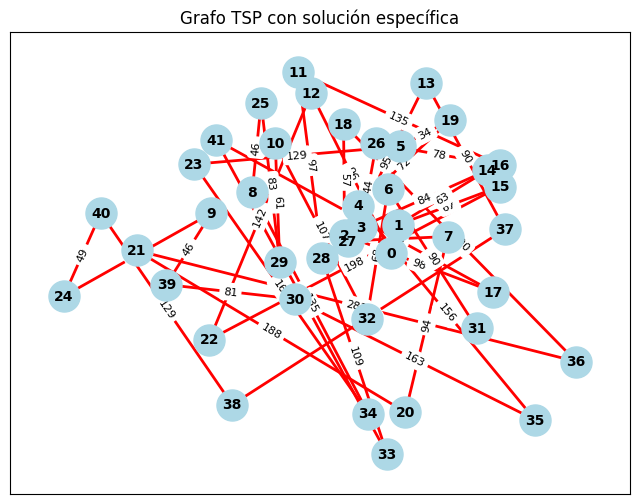

In [ ]:
plot_tsp_solution(problem.edge_weights, crear_solucion(Nodos))

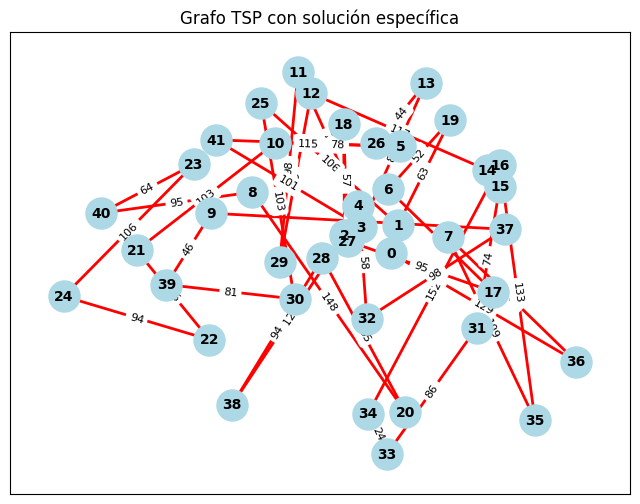

In [ ]:
plot_tsp_solution(problem.edge_weights, solucion)

## Búsqueda local con Entornos variables

In [21]:
###############################################################################
# BUSQUEDA LOCAL CON ENTORNOS VARIABLES (VNS - Variable Neighborhood Search)
###############################################################################

import random

def genera_vecina_2opt(solucion):
    """Entorno 1: 2-opt (intercambio de 2 nodos)"""
    mejor_solucion = solucion[:]
    mejor_distancia = distancia_total(solucion, problem)
    for i in range(1, len(solucion) - 1):
        for j in range(i + 1, len(solucion)):
            vecina = solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:]
            distancia_vecina = distancia_total(vecina, problem)
            if distancia_vecina <= mejor_distancia:
                mejor_distancia = distancia_vecina
                mejor_solucion = vecina
    return mejor_solucion


def genera_vecina_3opt(solucion):
    """Entorno 2: 3-opt (intercambio de 3 nodos)"""
    mejor_solucion = solucion[:]
    mejor_distancia = distancia_total(solucion, problem)
    n = len(solucion)
    for i in range(1, n - 2):
        for j in range(i + 1, n - 1):
            for k in range(j + 1, n):
                # Reordenamiento: invertir segmento entre i y k
                vecina = solucion[:i] + solucion[i:k+1][::-1] + solucion[k+1:]
                distancia_vecina = distancia_total(vecina, problem)
                if distancia_vecina <= mejor_distancia:
                    mejor_distancia = distancia_vecina
                    mejor_solucion = vecina
    return mejor_solucion


def genera_vecina_or_opt(solucion, seg_len=2):
    """Entorno 3: Or-opt (mover un segmento de 'seg_len' nodos a otra posición)"""
    mejor_solucion = solucion[:]
    mejor_distancia = distancia_total(solucion, problem)
    n = len(solucion)
    for i in range(1, n - seg_len):
        segmento = solucion[i:i + seg_len]
        resto = solucion[:i] + solucion[i + seg_len:]
        for j in range(1, len(resto)):
            vecina = resto[:j] + segmento + resto[j:]
            distancia_vecina = distancia_total(vecina, problem)
            if distancia_vecina <= mejor_distancia:
                mejor_distancia = distancia_vecina
                mejor_solucion = vecina
    return mejor_solucion


def perturbacion(solucion, entorno):
    """Perturbación aleatoria para escapar de óptimos locales según el entorno"""
    s = solucion[:]
    n = len(s)
    if entorno == 1:
        # Intercambio aleatorio de 2 nodos
        i, j = random.sample(range(1, n), 2)
        s[i], s[j] = s[j], s[i]
    elif entorno == 2:
        # Inversión aleatoria de un segmento
        i, j = sorted(random.sample(range(1, n), 2))
        s[i:j+1] = s[i:j+1][::-1]
    elif entorno == 3:
        # Reubicación aleatoria de un segmento
        i = random.randint(1, n - 3)
        seg = s[i:i+2]
        resto = s[:i] + s[i+2:]
        j = random.randint(1, len(resto) - 1)
        s = resto[:j] + seg + resto[j:]
    return s


def busqueda_local_entornos_variables(solucion_inicial, max_entornos=3, max_iter=100):
    """
    VNS: Variable Neighborhood Search
    - Alterna entre entornos de vecindad
    - Si no mejora, cambia al siguiente entorno (perturbación)
    - Si mejora, vuelve al primer entorno
    """
    entornos = [genera_vecina_2opt, genera_vecina_3opt, genera_vecina_or_opt]

    mejor_solucion = solucion_inicial[:]
    mejor_distancia = distancia_total(mejor_solucion, problem)

    print(f"Distancia Solución Inicial: {mejor_distancia:.2f}")

    for iteracion in range(max_iter):
        k = 0  # Empezamos en el primer entorno
        while k < max_entornos:
            # 1. Perturbación en el entorno k
            solucion_perturbada = perturbacion(mejor_solucion, k + 1)

            # 2. Búsqueda local desde la solución perturbada usando el entorno k
            solucion_local = entornos[k](solucion_perturbada)
            distancia_local = distancia_total(solucion_local, problem)

            # 3. Criterio de aceptación: si mejora, actualizar y volver al entorno 1
            if distancia_local < mejor_distancia:
                mejor_distancia = distancia_local
                mejor_solucion = solucion_local
                print(f"  Iter {iteracion+1}, Entorno {k+1}: Mejora -> {mejor_distancia:.2f}")
                k = 0  # Reiniciar al primer entorno
            else:
                k += 1  # Pasar al siguiente entorno

    print(f"\nDistancia Mejor Solución VNS: {mejor_distancia:.2f}")
    return mejor_solucion


# --- EJECUCIÓN ---
print("=" * 50)
print("BÚSQUEDA LOCAL CON ENTORNOS VARIABLES (VNS)")
print("=" * 50)

mejor_solucion_vns = busqueda_local_entornos_variables(
    solucion_inicial=solucion,
    max_entornos=3,
    max_iter=50
)

print("\nSolución final:", mejor_solucion_vns)

BÚSQUEDA LOCAL CON ENTORNOS VARIABLES (VNS)
Distancia Solución Inicial: 3746.00
  Iter 1, Entorno 2: Mejora -> 3571.00
  Iter 1, Entorno 1: Mejora -> 3238.00
  Iter 1, Entorno 1: Mejora -> 2991.00
  Iter 1, Entorno 2: Mejora -> 2856.00
  Iter 1, Entorno 1: Mejora -> 2789.00
  Iter 1, Entorno 2: Mejora -> 2681.00
  Iter 1, Entorno 2: Mejora -> 2597.00
  Iter 1, Entorno 3: Mejora -> 2416.00
  Iter 1, Entorno 1: Mejora -> 2341.00
  Iter 1, Entorno 1: Mejora -> 2212.00
  Iter 1, Entorno 2: Mejora -> 2082.00
  Iter 1, Entorno 1: Mejora -> 2079.00
  Iter 1, Entorno 3: Mejora -> 2028.00
  Iter 1, Entorno 3: Mejora -> 1948.00
  Iter 1, Entorno 2: Mejora -> 1927.00
  Iter 1, Entorno 1: Mejora -> 1919.00
  Iter 2, Entorno 2: Mejora -> 1908.00
  Iter 3, Entorno 3: Mejora -> 1886.00
  Iter 6, Entorno 3: Mejora -> 1850.00
  Iter 8, Entorno 2: Mejora -> 1842.00
  Iter 8, Entorno 1: Mejora -> 1839.00
  Iter 9, Entorno 2: Mejora -> 1766.00
  Iter 9, Entorno 2: Mejora -> 1707.00
  Iter 11, Entorno 2: M

# Mejorar función genera_vecina_aleatorio() de Simulate Annealing


In [29]:
###############################################################################
# GENERA VECINA ALEATORIO - MEJORADA (Multi-operador)
###############################################################################

def genera_vecina_aleatorio(solucion):
    """
    Generador de vecina mejorado: elige aleatoriamente entre 3 operadores
    para aumentar la diversidad de exploración en Simulated Annealing.

    Operadores:
      1. 2-opt swap     : intercambia 2 nodos (exploración local fina)
      2. Or-opt         : mueve un segmento de 2-3 nodos a otra posición
      3. 3-opt inversión: invierte un subsegmento (saltos más grandes)
    """
    operador = random.randint(1, 3)
    n = len(solucion)
    # Operador 1: 2-opt swap (igual que antes, base)

    if operador == 1:
        i, j = sorted(random.sample(range(1, n), 2))
        return solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:]
    # Operador 2: Or-opt (mover segmento)
    elif operador == 2:
        seg_len = random.choice([2, 3])           # Segmento de 2 o 3 nodos
        if n <= seg_len + 2:                       # Protección para listas cortas
            i, j = sorted(random.sample(range(1, n), 2))
            return solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:]

        i = random.randint(1, n - seg_len - 1)    # Posición origen del segmento
        segmento = solucion[i : i + seg_len]
        resto    = solucion[:i] + solucion[i + seg_len:]

        # Posición destino: distinta del origen para garantizar cambio real
        j = random.randint(1, len(resto) - 1)
        return resto[:j] + segmento + resto[j:]
    # Operador 3: 3-opt inversión de subsegmento
    else:
        i, j = sorted(random.sample(range(1, n), 2))
        return solucion[:i] + solucion[i:j+1][::-1] + solucion[j+1:]
#Funcion de probabilidad para aceptar peores soluciones
def probabilidad(T,d):
  if random.random() <  math.exp( -1*d / T)  :
    return True
  else:
    return False

#Funcion de descenso de temperatura
def bajar_temperatura(T):
  return T*0.99


In [35]:
def recocido_simulado(problem, TEMPERATURA ):
  #problem = datos del problema
  #T = Temperatura

  solucion_referencia = crear_solucion(Nodos)
  distancia_referencia = distancia_total(solucion_referencia, problem)

  mejor_solucion = []             #x* del seudocodigo
  mejor_distancia = 10e100        #F* del seudocodigo


  N=0
  while TEMPERATURA > .0001:
    N+=1
    #Genera una solución vecina
    vecina =genera_vecina_aleatorio(solucion_referencia)

    #Calcula su valor(distancia)
    distancia_vecina = distancia_total(vecina, problem)

    #Si es la mejor solución de todas se guarda(siempre!!!)
    if distancia_vecina < mejor_distancia:
        mejor_solucion = vecina
        mejor_distancia = distancia_vecina

    #Si la nueva vecina es mejor se cambia
    #Si es peor se cambia según una probabilidad que depende de T y delta(distancia_referencia - distancia_vecina)
    if distancia_vecina < distancia_referencia or probabilidad(TEMPERATURA, abs(distancia_referencia - distancia_vecina) ) :
      #solucion_referencia = copy.deepcopy(vecina)
      solucion_referencia = vecina
      distancia_referencia = distancia_vecina

    #Bajamos la temperatura
    TEMPERATURA = bajar_temperatura(TEMPERATURA)

  print("La mejor solución encontrada es " , end="")
  print(mejor_solucion)
  print("con una distancia total de " , end="")
  print(mejor_distancia)
  return mejor_solucion

sol  = recocido_simulado(problem, 10000000)

La mejor solución encontrada es [0, 7, 35, 36, 31, 17, 37, 16, 15, 14, 5, 13, 19, 6, 1, 26, 11, 10, 4, 2, 27, 28, 32, 3, 18, 12, 25, 41, 23, 9, 8, 40, 24, 21, 39, 22, 38, 29, 30, 34, 20, 33]
con una distancia total de 1722


## Vecina guiada por temperatura

In [43]:
def genera_vecina_aleatorio(solucion, temperatura=None, temp_inicial=None):
    """
    A temperatura ALTA → movimientos grandes (exploración)
    A temperatura BAJA → movimientos pequeños (explotación)
    """
    n = len(solucion)

    # Si tenemos temperatura, adaptamos el tamaño del segmento a invertir
    if temperatura and temp_inicial:
        ratio = temperatura / temp_inicial          # ratio: 1.0 (inicio) → 0.0 (fin)
        max_seg = max(2, int(ratio * (n // 2)))     # segmento grande al inicio, pequeño al final
        i = random.randint(1, n - 2)
        j = min(i + random.randint(1, max_seg), n - 1)
    else:
        i, j = sorted(random.sample(range(1, n), 2))

    return solucion[:i] + solucion[i:j+1][::-1] + solucion[j+1:]
#Funcion de probabilidad para aceptar peores soluciones
def probabilidad(T,d):
  if random.random() <  math.exp( -1*d / T)  :
    return True
  else:
    return False

#Funcion de descenso de temperatura
def bajar_temperatura(T):
  return T*0.99


In [44]:
def recocido_simulado(problem, TEMPERATURA ):
  #problem = datos del problema
  #T = Temperatura

  solucion_referencia = crear_solucion(Nodos)
  distancia_referencia = distancia_total(solucion_referencia, problem)

  mejor_solucion = []             #x* del seudocodigo
  mejor_distancia = 10e100        #F* del seudocodigo


  N=0
  while TEMPERATURA > .0001:
    N+=1
    #Genera una solución vecina
    vecina =genera_vecina_aleatorio(solucion_referencia)

    #Calcula su valor(distancia)
    distancia_vecina = distancia_total(vecina, problem)

    #Si es la mejor solución de todas se guarda(siempre!!!)
    if distancia_vecina < mejor_distancia:
        mejor_solucion = vecina
        mejor_distancia = distancia_vecina

    #Si la nueva vecina es mejor se cambia
    #Si es peor se cambia según una probabilidad que depende de T y delta(distancia_referencia - distancia_vecina)
    if distancia_vecina < distancia_referencia or probabilidad(TEMPERATURA, abs(distancia_referencia - distancia_vecina) ) :
      #solucion_referencia = copy.deepcopy(vecina)
      solucion_referencia = vecina
      distancia_referencia = distancia_vecina

    #Bajamos la temperatura
    TEMPERATURA = bajar_temperatura(TEMPERATURA)

  print("La mejor solución encontrada es " , end="")
  print(mejor_solucion)
  print("con una distancia total de " , end="")
  print(mejor_distancia)
  return mejor_solucion

sol  = recocido_simulado(problem, 10000000)

La mejor solución encontrada es [0, 1, 7, 37, 17, 36, 35, 31, 20, 33, 34, 38, 22, 39, 24, 40, 21, 9, 23, 41, 25, 12, 11, 10, 8, 29, 30, 32, 28, 2, 27, 3, 4, 6, 26, 18, 5, 19, 13, 16, 15, 14]
con una distancia total de 1452
